In [1]:
! pip install gdown -q

In [2]:
import gdown

url = 'https://drive.google.com/file/d/1D_Uesj--6NaeZ02M-FBlC1RwtiV-fe4k/view?usp=sharing'

gdown.download(url , fuzzy = True)

Downloading...
From (original): https://drive.google.com/uc?id=1D_Uesj--6NaeZ02M-FBlC1RwtiV-fe4k
From (redirected): https://drive.google.com/uc?id=1D_Uesj--6NaeZ02M-FBlC1RwtiV-fe4k&confirm=t&uuid=ddf24e45-9830-4799-8f57-cefb998a9bb0
To: /content/HeatMap_Data.zip
100%|██████████| 78.2M/78.2M [00:01<00:00, 69.6MB/s]


'HeatMap_Data.zip'

In [3]:
! unzip -q HeatMap_Data.zip

In [4]:
! rm -rf HeatMap_Data.zip

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import os

In [6]:
train_data_path = '/content/train/'
test_data_path = '/content/test/'

In [7]:
def count_images_per_class(dataset_dir):
    class_counts = {}
    for class_name in os.listdir(dataset_dir):
        class_path = os.path.join(dataset_dir, class_name)
        if os.path.isdir(class_path):
            class_counts[class_name] = len(os.listdir(class_path))
    return class_counts

train_counts = count_images_per_class(train_data_path)
print("Train:", train_counts)

Train: {'Defender': 111, 'Goalkeeper': 67, 'Midfielder': 116, 'Forward': 103}


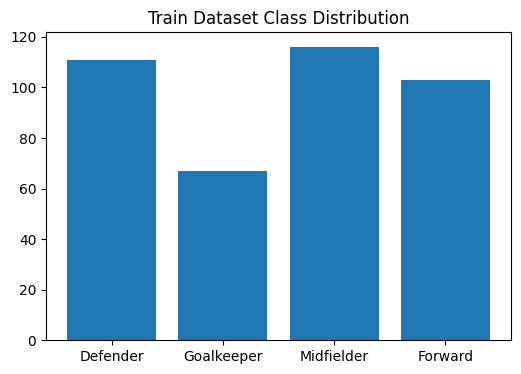

In [8]:
plt.figure(figsize=(6, 4))
plt.bar(train_counts.keys(), train_counts.values())
plt.title("Train Dataset Class Distribution")
plt.show()

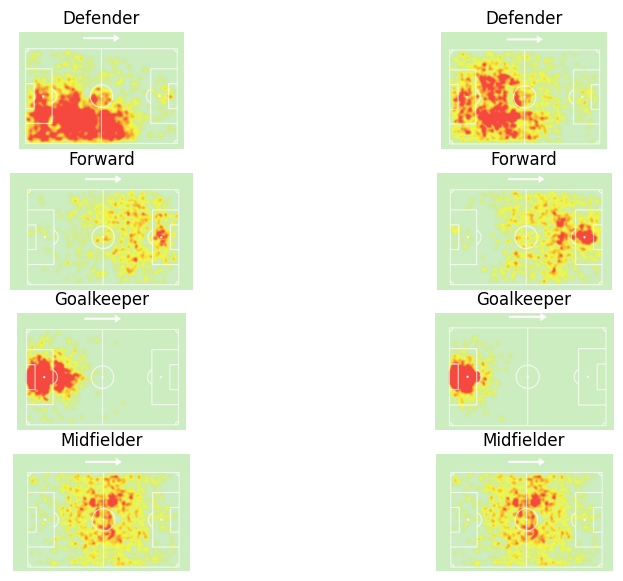

In [9]:
from PIL import Image
fig = plt.figure(figsize = (10 , 7))

plt.subplot(4 , 2 , 1)
plt.imshow(Image.open(train_data_path + 'Defender/D1.jpg') , cmap = 'gray')
plt.axis('off')
plt.title('Defender')

plt.subplot(4 , 2 , 2)
plt.imshow(Image.open(train_data_path + 'Defender/D10.jpg') , cmap = 'gray')
plt.axis('off')
plt.title('Defender')

plt.subplot(4 , 2 , 3)
plt.imshow(Image.open(train_data_path + 'Forward/F1.jpg') , cmap = 'gray')
plt.axis('off')
plt.title('Forward')

plt.subplot(4 , 2 , 4)
plt.imshow(Image.open(train_data_path + 'Forward/F10.jpg') , cmap = 'gray')
plt.axis('off')
plt.title('Forward')

plt.subplot(4 , 2 , 5)
plt.imshow(Image.open(train_data_path + 'Goalkeeper/G0.jpg') , cmap = 'gray')
plt.axis('off')
plt.title('Goalkeeper')

plt.subplot(4 , 2 , 6)
plt.imshow(Image.open(train_data_path + 'Goalkeeper/G11.jpg') , cmap = 'gray')
plt.axis('off')
plt.title('Goalkeeper')

plt.subplot(4 , 2 , 7)
plt.imshow(Image.open(train_data_path + 'Midfielder/M10.jpg') , cmap = 'gray')
plt.axis('off')
plt.title('Midfielder')

plt.subplot(4 , 2 , 8)
plt.imshow(Image.open(train_data_path + 'Midfielder/M10.jpg') , cmap = 'gray')
plt.axis('off')
plt.title('Midfielder')

plt.show()

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(rescale = 1 / 255 , validation_split = 0.2)

target_size = (224 , 224)
batch_size = 32
image_shape = (224 , 224 , 3)   # target_size + (3,)

In [14]:
train_data_gen = data_gen.flow_from_directory(train_data_path , target_size = target_size , batch_size = batch_size , subset = 'training' , class_mode = 'categorical')
valid_data_gen = data_gen.flow_from_directory(train_data_path , target_size = target_size , batch_size = batch_size , subset = 'validation' ,class_mode = 'categorical')


Found 319 images belonging to 4 classes.
Found 78 images belonging to 4 classes.


In [15]:
class_names = train_data_gen.class_indices
class_names

{'Defender': 0, 'Forward': 1, 'Goalkeeper': 2, 'Midfielder': 3}

In [16]:
from keras.layers import Conv2D , MaxPooling2D , Flatten , Dense , Dropout

In [17]:
model = keras.models.Sequential()
model.add(Conv2D(filters = 32 , kernel_size = (3 , 3) , activation = 'relu' , input_shape = image_shape , padding = 'same' , strides = 1))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Conv2D(filters = 128 , kernel_size = (3 , 3) , activation = 'relu' , padding = 'same' , strides = 1))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Conv2D(filters = 512 , kernel_size = (3 , 3) , activation = 'relu' , padding = 'same' , strides = 1))
model.add(MaxPooling2D(pool_size = (2 , 2)))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(rate = 0.4))
model.add(Dense(units = 32 , activation = 'relu'))
model.add(Dropout(rate = 0.3))
model.add(Dense(units = 4 , activation = 'softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 128)  │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 401408)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   205,521,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           132 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 206,219,556 (786.67 MB)

 Trainable params: 206,219,556 (786.67 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
model.compile(
    optimizer = tf.optimizers.Adam(learning_rate = 0.002) ,
    loss = tf.losses.CategoricalCrossentropy() ,
    metrics = [tf.metrics.CategoricalAccuracy]
)

In [20]:
model.fit(train_data_gen , epochs = 20 , batch_size = batch_size , validation_data = valid_data_gen , verbose = 2)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
10/10 - 35s - 4s/step - categorical_accuracy: 0.2759 - loss: 10.2255 - val_categorical_accuracy: 0.2821 - val_loss: 1.3154
Epoch 2/20
10/10 - 2s - 229ms/step - categorical_accuracy: 0.5016 - loss: 1.0780 - val_categorical_accuracy: 0.7051 - val_loss: 0.8618
Epoch 3/20
10/10 - 3s - 250ms/step - categorical_accuracy: 0.6897 - loss: 0.7721 - val_categorical_accuracy: 0.9231 - val_loss: 0.3291
Epoch 4/20
10/10 - 2s - 215ms/step - categorical_accuracy: 0.8119 - loss: 0.4798 - val_categorical_accuracy: 0.8846 - val_loss: 0.2885
Epoch 5/20
10/10 - 2s - 215ms/step - categorical_accuracy: 0.8495 - loss: 0.4886 - val_categorical_accuracy: 0.9487 - val_loss: 0.1772
Epoch 6/20
10/10 - 2s - 207ms/step - categorical_accuracy: 0.8777 - loss: 0.3199 - val_categorical_accuracy: 0.9359 - val_loss: 0.2115
Epoch 7/20
10/10 - 2s - 210ms/step - categorical_accuracy: 0.9185 - loss: 0.2649 - val_categorical_accuracy: 0.9487 - val_loss: 0.1909
Epoch 8/20
10/10 - 2s - 233ms/step - categorical_accurac

In [21]:
from PIL import Image

index_to_class = {v : k for k , v in class_names.items()}

preds = []

for index in range(0 , len(os.listdir(test_data_path))):
    img = Image.open(test_data_path + f'{index}.jpg')
    img = np.array(img.convert('RGB').resize(target_size , Image.BILINEAR))
    img = img / 255
    img = np.expand_dims(img , axis = 0)
    preds.append(index_to_class[np.argmax(model.predict(img , verbose = 0))])

In [22]:
submission = pd.DataFrame({'Position' : preds})
submission.to_csv('submission.csv' , index = False)